In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [106]:
df=pd.read_csv("C:\\Users\\ramu\\Desktop\\ML and Data science\\data\\titanic\\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Brief Analysis

In [3]:
ts=df[df.Survived==1]
len(ts)


342

In [4]:
df.Cabin.unique

<bound method Series.unique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [5]:
df.shape

(891, 12)

In [6]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Sex

In [116]:
#comparing survival rate for men and women
df_survived=df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()
df_survived

,Sex,Survived
0,female,0.742038
1,male,0.188908


# Pclass

In [123]:

print(df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


# Embarked

In [124]:
print(df[['Embarked','Survived']].groupby('Embarked',as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


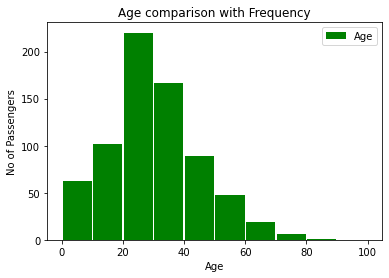

In [11]:
## to compare age with frequency of passengers
plt.hist(df['Age'],bins=[0,10,20,30,40,50,60,70,80,90,100],rwidth=0.95,label='Age',color='green')
plt.xlabel('Age')
plt.ylabel('No of Passengers')
plt.title('Age comparison with Frequency')
plt.legend()

## Choosing the Important Features

In [14]:
## Removing the features that could not help us
df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [15]:
## Removing the rows that has null values of Embarked
df.dropna(subset=['Embarked'],inplace=True)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

## Handling missing Data

In [16]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [17]:
median_=df['Age'].median()//1
median_


28.0

In [19]:
df['Age'].fillna(median_,inplace=True)

In [20]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
##Converting categorical features into numerical features
dummies=pd.get_dummies(df,columns=['Sex','Embarked','Pclass'])
X=dummies.drop(['Survived'],axis=1)
Y=dummies['Survived']
X


,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,1,0,0,1,0,1,0
887,19.0,0,0,30.0000,1,0,0,0,1,1,0,0
888,28.0,1,2,23.4500,1,0,0,0,1,0,0,1
889,26.0,0,0,30.0000,0,1,1,0,0,1,0,0


## Fitting the model

In [58]:

from sklearn.model_selection import train_test_split
np.random.seed(40)
#splitting the training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [23]:
#lets try using one model first
model=RandomForestClassifier()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8033707865168539

Going to try 4 different machine learning models:
1) Logistic Regression                                                                                                         
2) K-Nearest Neighbours Classifier                                                                                             
3) Random Forest Classifier                                                                                                     
4) SVC

In [28]:
Models={"logistic_regression":LogisticRegression(),
       "knn":KNeighborsClassifier(),
       "random_forest":RandomForestClassifier(),
       "SVC":SVC()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    this function Fits and evaluates given machine learning models.
    models  : a dict of different Scikit-Learn machine learning models
    X_train : training data 
    X_test  : testing data
    Y_train : training labels
    Y_test  : test labels
    
    """
    np.random.seed(40)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores
        
        
    

In [29]:
scores=fit_and_score(Models,X_train, X_test, Y_train, Y_test)
scores

C:\Users\ramu\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic_regression': 0.8089887640449438,
 'knn': 0.7078651685393258,
 'random_forest': 0.7921348314606742,
 'SVC': 0.6910112359550562}

In [30]:
model_compare=pd.DataFrame(scores,index=["Accuracy"])
model_compare

,logistic_regression,knn,random_forest,SVC
Accuracy,0.808989,0.707865,0.792135,0.691011


<AxesSubplot:>

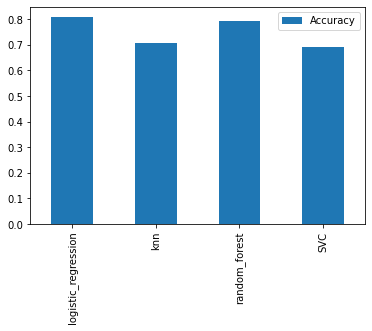

In [31]:
model_compare.T.plot.bar()

## HyperParameter Tuning

In [32]:

knn_grid={'n_neighbors':np.arange(1,10,1),
         'weights':['uniform','distance']}

knn_model=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,cv=5,verbose=True)
knn_model.fit(X_train,Y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             verbose=True)

In [33]:
print(knn_model.best_score_)
print(knn_model.best_estimator_)
print(knn_model.best_params_)

0.7201812272234808
KNeighborsClassifier(n_neighbors=7, weights='distance')
{'n_neighbors': 7, 'weights': 'distance'}


In [34]:

# Creating a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Creating a hyperparameter grid for LogisticRegression
lr_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}





In [35]:
## tuning hyperparameters for random forest regressor by using RandomizedSearchCV
np.random.seed(40)
rf_model=RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=25,
                           verbose=True)
rf_model.fit(X_train,Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
print(rf_model.best_score_)
print(rf_model.best_estimator_)
print(rf_model.best_params_)

0.8382645523490595
RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=460)
{'n_estimators': 460, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 10}


In [73]:
ideal_model=RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=460,min_samples_leaf=1)
ideal_model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=6, n_estimators=460)

In [74]:
ideal_model.score(X_test,Y_test)

0.8033707865168539

In [75]:
Y_preds=ideal_model.predict(X_test)
Y_preds

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [38]:
## tuning hyperparameters for logistic regression by using RandomizedSearchCV
lr_model=RandomizedSearchCV(LogisticRegression(),
                           param_distributions=lr_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
lr_model.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
print(lr_model.best_score_)
print(lr_model.best_estimator_)
print(lr_model.best_params_)

0.8072983354673496
LogisticRegression(C=0.03359818286283781, solver='liblinear')
{'solver': 'liblinear', 'C': 0.03359818286283781}


In [40]:
lr_model.score(X_test,Y_test)

0.797752808988764

## Finding predictions for test data

In [41]:
test_data=pd.read_csv("C:\\Users\\ramu\\Desktop\\ML and Data science\\data\\titanic\\test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [42]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
passenger_id=test_data["PassengerId"]
passenger_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [44]:
test_data.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
test_data[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [47]:
X_TEST=pd.get_dummies(test_data,columns=['Sex','Embarked','Pclass'])
X_TEST

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,0,0,8.0500,0,1,0,0,1,0,0,1
414,39.0,0,0,108.9000,1,0,1,0,0,1,0,0
415,38.5,0,0,7.2500,0,1,0,0,1,0,0,1
416,NaN,0,0,8.0500,0,1,0,0,1,0,0,1


In [48]:

X_TEST["Age"].fillna(X_TEST["Age"].median()//1,inplace=True)
X_TEST["Fare"].fillna(X_TEST["Fare"].median(),inplace=True)

In [49]:
X_TEST.isna().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [76]:
test_preds=ideal_model.predict(X_TEST)
test_preds


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [77]:
preds=pd.DataFrame()

In [78]:
preds['PassengerId']=passenger_id
preds['Survived']=test_preds

In [79]:
preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [100]:
## saving our predictions data frame to csv 
preds.to_csv("C:\\Users\\ramu\\Desktop\\ML and Data science\\data\\titanic_survival_preds.csv",index=False)

## Evaluation metrics

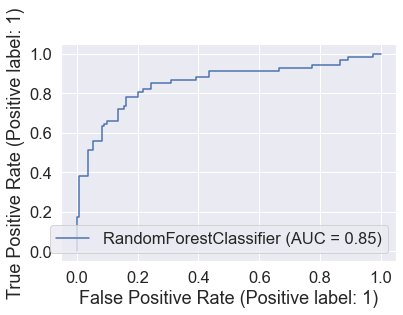

In [99]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(ideal_model, X_test, Y_test)


In [65]:
## confusion matrix
print(confusion_matrix(Y_test,Y_preds))

[[93 17]
 [19 49]]


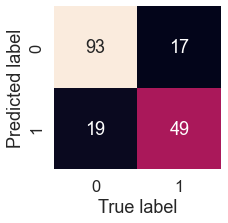

In [66]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix by using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(Y_test, Y_preds)

In [67]:
print(classification_report(Y_test,Y_preds))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.74      0.72      0.73        68

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [87]:
importances=ideal_model.feature_importances_
importances

array([0.17580209, 0.05121058, 0.04063802, 0.18515308, 0.19330581,
       0.17871612, 0.01530297, 0.01074923, 0.02291208, 0.04275479,
       0.01899245, 0.06446277])

In [91]:
# matching feature variables to feature importances
feature_dict=dict(zip(X.columns,importances))
feature_dict

{'Age': 0.17580208575022185,
 'SibSp': 0.05121058327042474,
 'Parch': 0.040638021869535586,
 'Fare': 0.18515308492371008,
 'Sex_female': 0.19330581058304602,
 'Sex_male': 0.17871611946787627,
 'Embarked_C': 0.015302971614482274,
 'Embarked_Q': 0.010749233110293943,
 'Embarked_S': 0.022912075313943066,
 'Pclass_1': 0.0427547888064266,
 'Pclass_2': 0.01899245419965384,
 'Pclass_3': 0.06446277109038556}

<AxesSubplot:title={'center':'Future_importances'}>

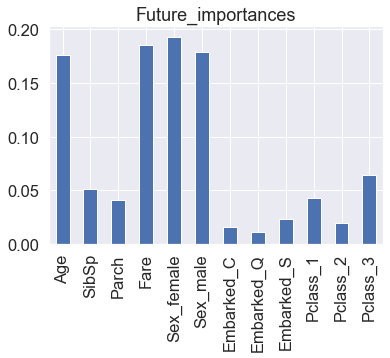

In [98]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Future_importances',legend=False)

In [102]:
X.head().T

,0,1,2,3,4
Age,22.00,38.0000,26.000,35.0,35.00
SibSp,1.00,1.0000,0.000,1.0,0.00
Parch,0.00,0.0000,0.000,0.0,0.00
Fare,7.25,71.2833,7.925,53.1,8.05
Sex_female,0.00,1.0000,1.000,1.0,0.00
Sex_male,1.00,0.0000,0.000,0.0,1.00
Embarked_C,0.00,1.0000,0.000,0.0,0.00
Embarked_Q,0.00,0.0000,0.000,0.0,0.00
Embarked_S,1.00,0.0000,1.000,1.0,1.00
Pclass_1,0.00,1.0000,0.000,1.0,0.00
